In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark-palette')
sns.set_style("darkgrid")

## Reading Data from CSV File

In [3]:
df = pd.read_csv(r'data/ObesityDataSet_raw_and_data_sinthetic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [5]:
# Changing the Target to 4 Classes.
df['Target'] = df['NObeyesdad'].replace({
    'Overweight_Level_I': 'OW', 
    'Overweight_Level_II': 'OW',
    'Overweight_Level_III': 'OW',
    'Obesity_Type_I': 'OB',
    'Obesity_Type_II': 'OB',
    'Obesity_Type_III': 'OB',
    'Normal_Weight': 'NW',
    'Insufficient_Weight': 'IW'
})

In [10]:
df['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

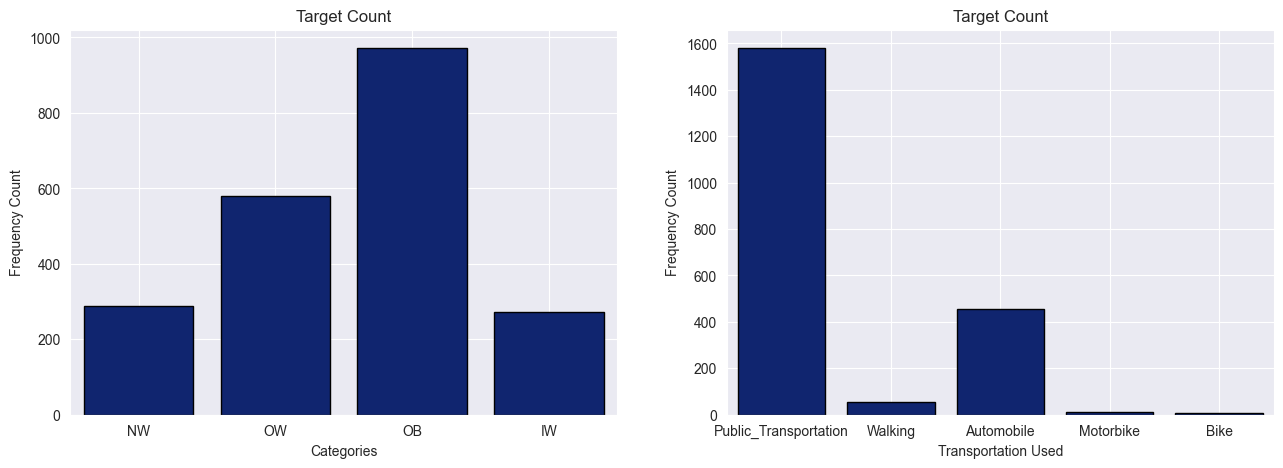

In [16]:
plt.figure(figsize=(24, 5))

plt.subplot(131)
plot = sns.countplot(x='Target', data=df, edgecolor='black')
plot.set_title("Target Count")
plot.set_xlabel("Categories")
plot.set_ylabel("Frequency Count")
plot.grid(True)

plt.subplot(132)
plot = sns.countplot(x='MTRANS', data=df, edgecolor='black')
plot.set_title("Target Count")
plot.set_xlabel("Transportation Used")
plot.set_ylabel("Frequency Count")
plot.grid(True)

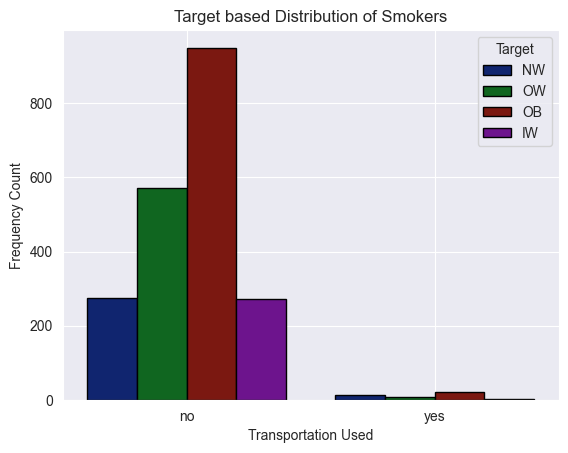

In [14]:
plot = sns.countplot(x='SMOKE', data=df, edgecolor='black', hue='Target')
plot.set_title("Target based Distribution of Smokers")
plot.set_xlabel("Transportation Used")
plot.set_ylabel("Frequency Count")
plot.grid(True)

In [17]:
# One Hot Encoding of Data ...
df = pd.get_dummies(
    df, 
    columns=[
        'Gender', 'CAEC', 'SMOKE', 'SCC', 'CALC', 
        'MTRANS', 'family_history_with_overweight', 'FAVC'
    ], 
    prefix=['GENDER', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'FHO', 'FAVC'],
    dtype=np.int8
)

In [18]:
# Uppercase Column Names
df.columns = df.columns.str.upper()

In [19]:
# Dropping useless columns
df_final = df.drop(axis=1, columns=['NOBEYESDAD'])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_final[
    ['AGE', 'HEIGHT', 'WEIGHT']
] = scaler.fit_transform(df_final[['AGE', 'HEIGHT', 'WEIGHT']].values)

<Axes: >

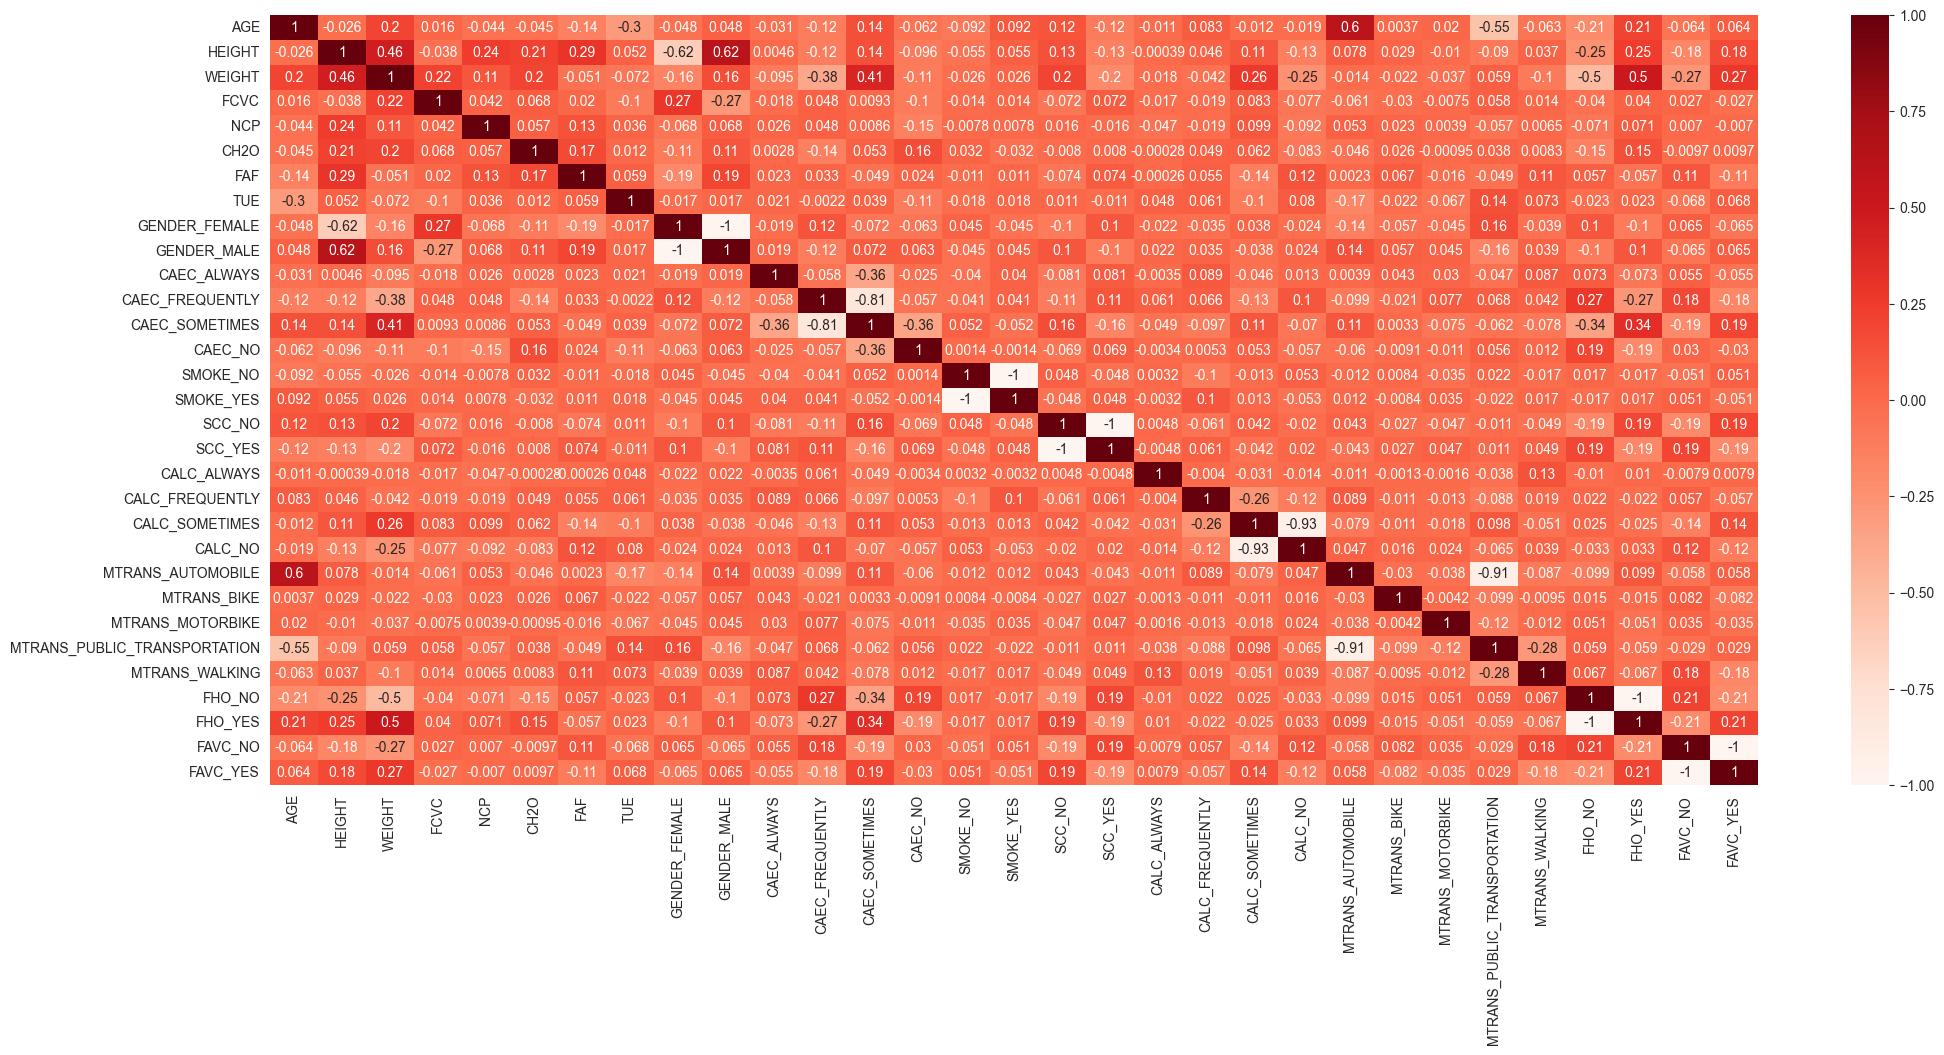

In [69]:
# Dropping Highly Correlated Data.
plt.figure(figsize=(24, 10))
correlation_mtx  = df_final.drop(['TARGET'], axis=1).corr()
sns.heatmap(correlation_mtx, annot=True, cmap='Reds')

In [70]:
# Removing Highly Corr Values from DF ....
df_final.drop(axis=1, columns=['GENDER_FEMALE', 'SMOKE_NO', 'SCC_NO', 'FHO_NO', 'FAVC_NO' ], inplace=True)

<Axes: >

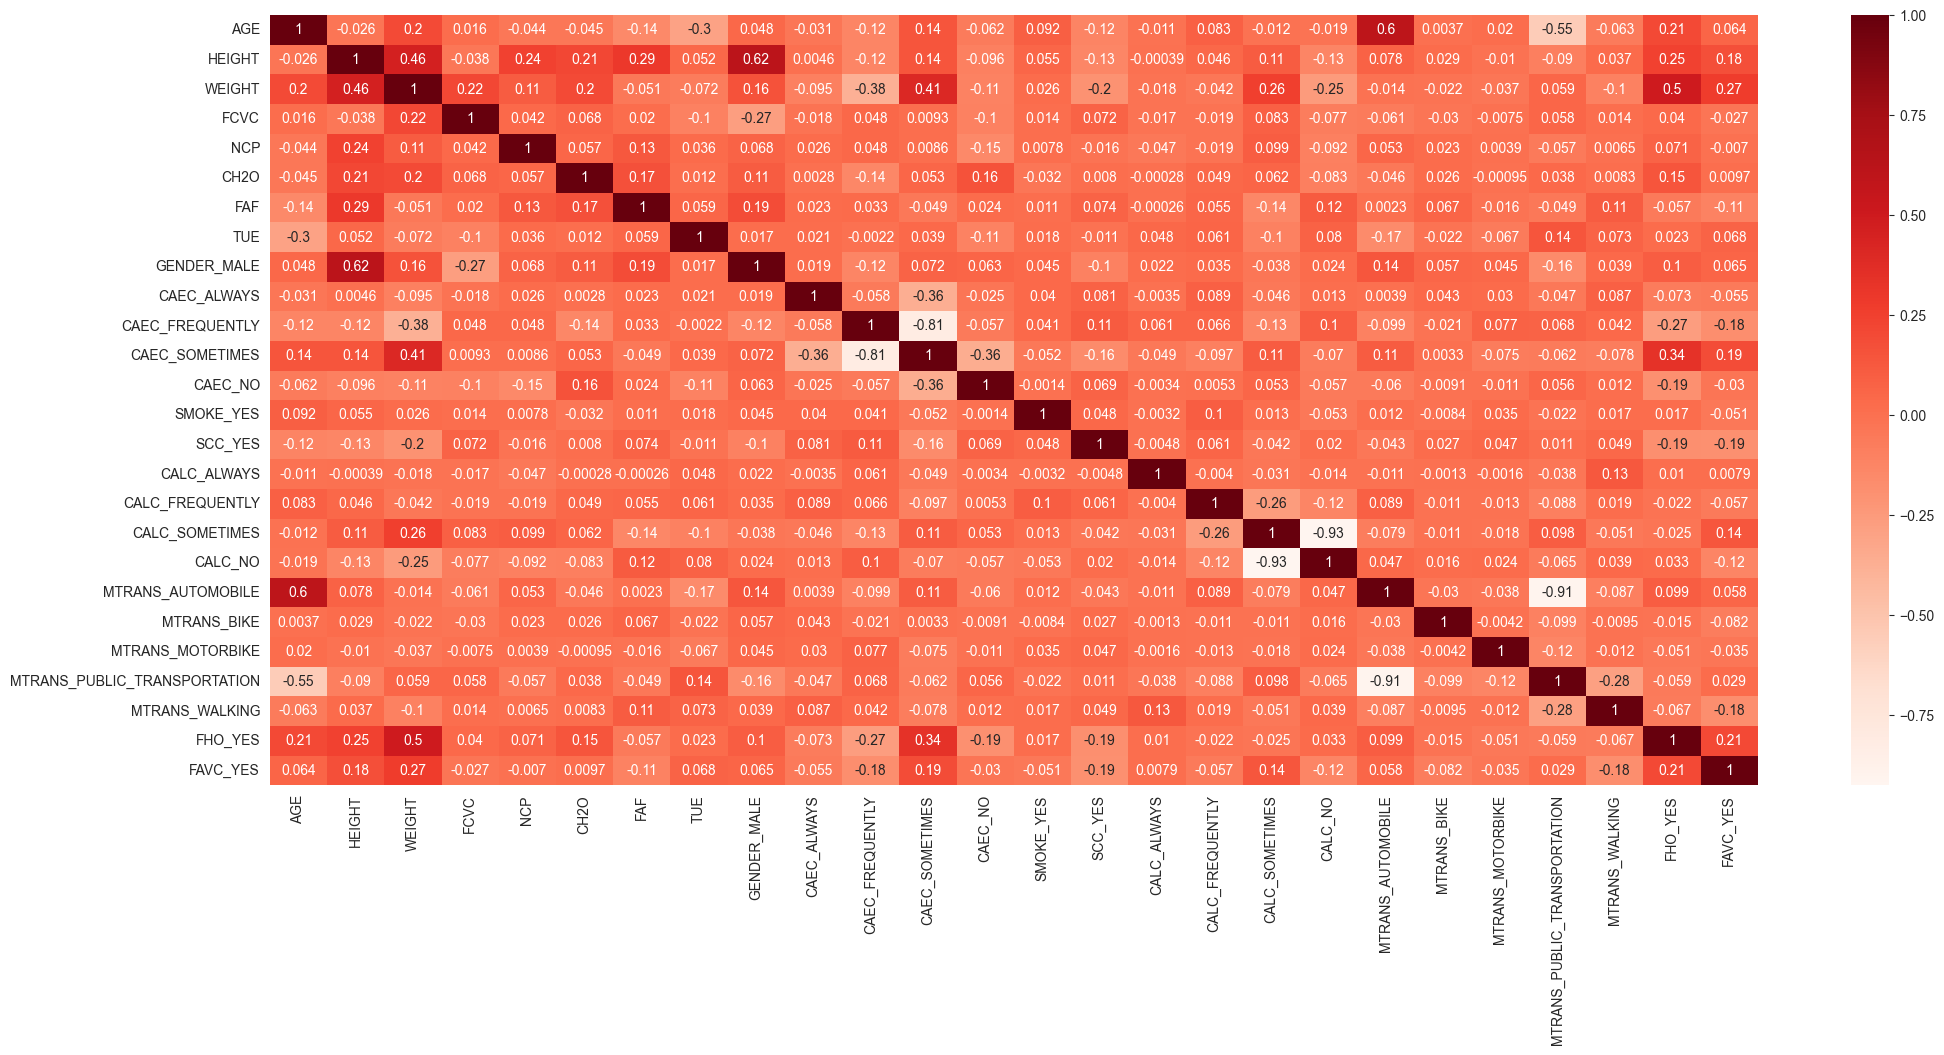

In [71]:
# Re-plotting Graph for Verification

plt.figure(figsize=(24, 10))
correlation_mtx  = df_final.drop(['TARGET'], axis=1).corr()
sns.heatmap(correlation_mtx, annot=True, cmap='Reds')

## Fitting Model After Scaling and Encoding of Data

In [72]:
X = df_final.drop(columns=['TARGET'])
y = df_final[['TARGET']]

### Test Train Split

We have to split the data into Train and Test Data in order to create and evaluate the model under consideration.

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, train_size=0.8
)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Parameters For Logistic Regression
solver = ['saga', 'sag']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]

params = dict(C=c_values, penalty=penalty, solver=solver)

# Fitting Model  - Hyper Parameter Tuning

In [78]:
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='recall'
)

In [79]:
grid.fit(X_train, y_train)

C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **sc

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'sag']},
             scoring='recall')

In [53]:
y_pred = grid.predict(X_test)

# Calculating Scores

In [60]:
from sklearn import metrics as mtx

mtx.accuracy_score(y_test, y_pred), mtx.recall_score(y_test, y_pred, average='macro'), mtx.precision_score(y_test, y_pred, average='macro')

(0.9692671394799054,
 np.float64(0.9509281801582472),
 np.float64(0.958280869396954))

In [62]:
grid.cv_results_

{'mean_fit_time': array([0.2155273 , 0.        , 0.12227774, 0.1087841 , 0.00312462,
        0.        , 0.17915521, 0.        , 0.10229282, 0.10581756,
        0.        , 0.00314136, 0.18505988, 0.        , 0.10186167,
        0.10292354, 0.        , 0.        , 0.17644668, 0.        ,
        0.11138883, 0.07138343, 0.        , 0.00210381, 0.02822542,
        0.        , 0.05804143, 0.01885033, 0.        , 0.        ]),
 'std_fit_time': array([0.03999224, 0.        , 0.03423526, 0.01792137, 0.00624924,
        0.        , 0.02684385, 0.        , 0.0070379 , 0.01172717,
        0.        , 0.00628271, 0.042923  , 0.        , 0.01208783,
        0.01305714, 0.        , 0.        , 0.03396436, 0.        ,
        0.0199173 , 0.00721331, 0.        , 0.00420761, 0.01183313,
        0.        , 0.01817881, 0.00620642, 0.        , 0.        ]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.00392647, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.  

In [80]:
y_pred.shape, y_test.shape

((423,), (423, 1))